# Python Translate Script

### IMPORTANT: install BioPython so that this will work
### Here's the start of our Python script. Thanks for completing it for me! - Dr. X

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils import molecular_weight
import matplotlib.pyplot as plt
import pandas as pd

## Part 1
### GET SEQUENCES FUNCTION 
#### Dr. X: this gets sequences 

In [ ]:
def get_sequences_from_file(fasta_fn):## takes in a fasta file
    sequence_data_dict = {} ## creates an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): ## loads the fasta_fn data in fasta format 
        description = record.description.split() ## will separate the words of each description with a comma
        species_name = description[1] + " " + description[2] ## extracts and combines the second and third words and saves as species name
        sequence_data_dict[species_name] = record.seq ## adds species and record to the dictionary
    return(sequence_data_dict)

## Part 2
### YOUR STRING-TRANSLATE FUNCTION


#### All sequences start at codon position 1
#### sourced from: https://decodingbiology.substack.com/p/introduction-to-python-for-bioinformatics

In [ ]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] ## read in the translation table
    aa_seq_string = "" ## makes an empty string
    for i in range(0, len(string_nucleotides), 3): ## read through the codons on string and stops at stop condon
        codon = string_nucleotides[i:i+3]
        aa = mito_table[codon]
        if aa == 'TAA' or 'AGA' or 'TAG' or 'AGG':
            break
        else: 
            aa_seq_string += mito_table.forward_table[codon] ## retrieves the amino acid
    return(aa_seq_string) ## returns amino acid sequence

## Part 3
### YOUR ALTERNATIVE FUNCTION

In [ ]:
def alt_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq = Seq(string_nucleotides)
    alt_aa_seq_string = record.seq.translate(table=mito_table)
    return str(alt_aa_seq_string) #return to amino acid sequence

## Part 4 
### YOUR COUNT AA ANALYSIS FUNCTION

In [ ]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq) ## uses BioPython protein analysis function
    mw = analysed_seq.molecular_weight() ## pulls molecular weight from analysis 
    return(molecular_weight) ## returns to molecular weight

## Part 5
### YOUR GC CONTENT ANALYSIS FUNCTION

In [ ]:
def calc_gc_content(string_nucleotides):
    gc_count = sequence.count('G') + sequence.count('C') ## counts number of G's and C's in a sequence and sums together
    return (gc_count / len(sequence)) * 100.0 ## return GC content in percentage

# MAIN


## Part 6

#### Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
#### Set the value to 'NaN' to indicate that these cells are currently empty.

##### source from: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820 and https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [2]:
def get_sequences_from_file(filename):
    return list(SeqIO.parse(filename, "fasta"))

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") ## Includes only data for body mass 
species_list = list(penguins_df.species) ## Species list

penguins_df['Molecular_Weight'] = 'NaN'## Adds molecular weight column with NaN values
penguins_df['GC_content'] = 'NaN'## Adds GC content column with NaN values

display(penguins_df) ## View added columns




,species,mass,Molecular_Weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## Part 7

#### Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame
##### sourced from: https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/?utm_source=chatgpt.com

In [5]:

for index, record in enumerate(cytb_seqs): 
    org_seq = str(record.seq) ## Saves sequence as a string
    aa_seq = record.seq.translate() ## Translates sequence
    aa_seq_str = str(aa_seq).replace('*','') ## Converts seq object to string and removes stop codons
    penguins_df.at[index,'Molecular_Weight'] = molecular_weight(aa_seq_str, seq_type = "protein")
    penguins_df.at[index,'GC_Content'] = ((org_seq.count('G') + org_seq.count('C'))/ len(org_seq)) * 100.0

display(penguins_df)


,species,mass,Molecular_Weight,GC_content,GC_Content
0,Aptenodytes forsteri,28.00,40471.2343,NaN,48.381452
1,Aptenodytes patagonicus,13.40,40743.5104,NaN,49.693788
2,Eudyptes chrysocome,2.80,40709.4942,NaN,51.181102
3,Eudyptes chrysolophus,4.50,40865.6781,NaN,50.918635
4,Eudyptes sclateri,4.25,40709.4942,NaN,50.831146
5,Eudyptula minor,1.60,40335.1015,NaN,49.256343
6,Pygoscelis adeliae,4.60,40674.4945,NaN,49.081365
7,Pygoscelis antarctica,4.10,40193.8878,NaN,47.769029
8,Pygoscelis papua,6.10,40403.2598,NaN,47.156605
9,Spheniscus demersus,3.20,40238.9329,NaN,48.293963


## Part 8
#### Plot a bar-chart of the mass with the x-axes labeled with species names.
##### source from: https://stackoverflow.com/questions/29498652/plot-a-bar-plot-from-a-pandas-dataframe

<Axes: title={'center': 'Average Mass of Penguin Species'}, xlabel='Species', ylabel='Mass(kg)'>

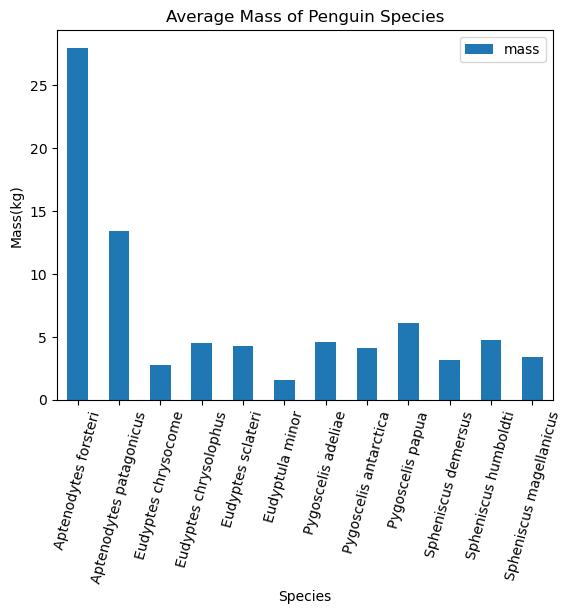

In [7]:
penguins_df.plot(x='species', y='mass', kind='bar', title='Average Mass of Penguin Species', ylabel='Mass(kg)', xlabel='Species', rot=75)



The smallest penguin species is Eudyptula minor, commonly known as little penguin. It inhabits the coasts of Southern Australia and New Zealand (Hoskins, et al., 2008).

## Part 9
#### Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

<Axes: title={'center': 'Molecular Weight vs GC Content of Penguin Sequences'}, xlabel='GC-Content', ylabel='Molecular Weight'>

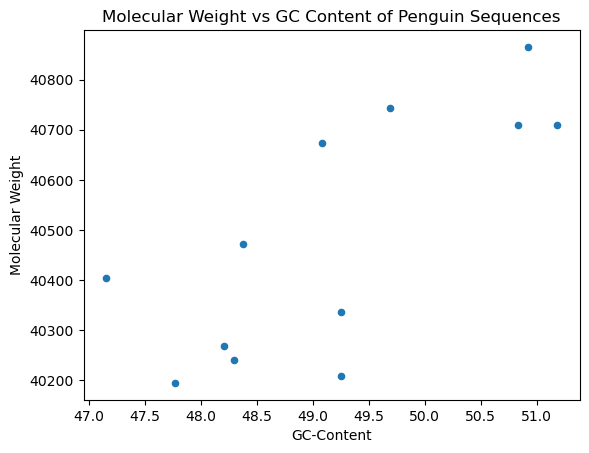

In [54]:
penguins_df.plot(x='GC_Content', y='Molecular_Weight', kind="scatter", title="Molecular Weight vs GC Content of Penguin Sequences", xlabel="GC-Content", ylabel="Molecular Weight")






## Part 10
#### Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [56]:
penguins_df.to_csv("penguins_mass_cytb.csv")